In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pycountry

In [2]:
# pip install pycountry


In [3]:
df = pd.read_csv('world_bank_data.csv')

In [4]:
df.head(10)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,06/28/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
4,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
5,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
6,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
7,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0
8,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2745972.0
9,Andorra,AND,"Population, total",SP.POP.TOTL,9443.0,10216.0,11014.0,11839.0,12690.0,13563.0,...,71621.0,71746.0,72540.0,73837.0,75013.0,76343.0,77700.0,79034.0,79824.0,80088.0


In [5]:
df.shape

(269, 68)

In [6]:
df.shape

(269, 68)

In [7]:
df = df.drop([0, 1])

df.reset_index(drop=True, inplace=True)

new_columns = [
    'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 
    '1960', '1961', '1962', '1963', '1964', '1965', 
    '1966', '1967', '1968', '1969', '1970', '1971', 
    '1972', '1973', '1974', '1975', '1976', '1977', 
    '1978', '1979', '1980', '1981', '1982', '1983', 
    '1984', '1985', '1986', '1987', '1988', '1989', 
    '1990', '1991', '1992', '1993', '1994', '1995', 
    '1996', '1997', '1998', '1999', '2000', '2001', 
    '2002', '2003', '2004', '2005', '2006', '2007', 
    '2008', '2009', '2010', '2011', '2012', '2013', 
    '2014', '2015', '2016', '2017', '2018', '2019', 
    '2020', '2021', '2022', '2023'
]



df.columns = new_columns # Replace the column headers


df = df.dropna(subset=['Country Name'])

In [8]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
1,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
4,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0


In [9]:
index_to_drop = 0  # Replace with the index of the row you want to drop
df.drop(index=index_to_drop, inplace=True)

In [10]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
4,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
5,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [11]:
df.drop(['Indicator Name', 'Country Code'], axis =1)

,Country Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Aruba,SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
2,Africa Eastern and Southern,SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
3,Afghanistan,SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
4,Africa Western and Central,SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
5,Angola,SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Kosovo,SP.POP.TOTL,990150.0,1014211.0,1038618.0,1063175.0,1087700.0,1111812.0,1135522.0,1159611.0,...,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1768086.0,1756374.0
263,"Yemen, Rep.",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,34449825.0
264,South Africa,SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,...,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,60414495.0
265,Zambia,SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,...,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20569737.0


In [12]:
df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2019              1
2020              1
2021              1
2022              1
2023              1
Length: 68, dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2019              0
2020              0
2021              0
2022              0
2023              0
Length: 68, dtype: int64

In [15]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.157939e+08,1.173869e+08,1.195401e+08,1.222050e+08,1.248922e+08,1.276182e+08,1.304676e+08,1.333152e+08,1.362430e+08,1.392759e+08,...,2.959015e+08,2.997592e+08,3.036163e+08,3.074805e+08,3.112834e+08,3.150058e+08,3.186135e+08,3.218743e+08,3.248286e+08,3.281899e+08
std,3.639920e+08,3.684672e+08,3.751049e+08,3.837174e+08,3.923714e+08,4.011556e+08,4.104328e+08,4.196670e+08,4.291879e+08,4.390998e+08,...,9.239990e+08,9.352440e+08,9.464234e+08,9.576144e+08,9.685176e+08,9.790906e+08,9.892008e+08,9.982706e+08,1.006189e+09,1.015200e+09
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,...,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04,1.139600e+04
25%,5.132212e+05,5.231345e+05,5.337595e+05,5.449288e+05,5.566630e+05,5.651150e+05,5.691470e+05,5.773872e+05,5.832700e+05,5.875942e+05,...,1.670147e+06,1.706191e+06,1.700500e+06,1.712904e+06,1.723991e+06,1.729916e+06,1.741612e+06,1.748145e+06,1.744792e+06,1.745948e+06
50%,3.708088e+06,3.816540e+06,3.931214e+06,4.033994e+06,4.112910e+06,4.194930e+06,4.257383e+06,4.317222e+06,4.410692e+06,4.515734e+06,...,1.034159e+07,1.038195e+07,1.042652e+07,1.044737e+07,1.042760e+07,1.055977e+07,1.065204e+07,1.053749e+07,1.057953e+07,1.073374e+07
75%,2.670606e+07,2.748694e+07,2.830289e+07,2.914708e+07,3.001684e+07,3.084892e+07,3.163010e+07,3.209247e+07,3.249927e+07,3.277149e+07,...,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.161352e+07,6.304870e+07,6.444782e+07,6.607106e+07,6.762114e+07
max,3.031517e+09,3.072470e+09,3.126894e+09,3.193470e+09,3.260480e+09,3.328243e+09,3.398510e+09,3.468395e+09,3.540186e+09,3.614593e+09,...,7.317305e+09,7.404251e+09,7.490956e+09,7.577110e+09,7.661178e+09,7.742725e+09,7.821272e+09,7.888964e+09,7.951595e+09,8.024997e+09


In [16]:
df['Total_Population'] = df.loc[:, '1960':'2023'].sum(axis=1)

df_sorted = df.sort_values(by='Total_Population', ascending=True) 

bottom_10_countries = df_sorted.head(10) 

In [17]:
print(bottom_10_countries[['Country Name', 'Total_Population']])

                  Country Name  Total_Population
246                     Tuvalu          550928.0
180                      Nauru          576341.0
189                      Palau          980972.0
229   Turks and Caicos Islands         1138616.0
256     British Virgin Islands         1139129.0
148   St. Martin (French part)         1368385.0
226  Sint Maarten (Dutch part)         1481454.0
213                 San Marino         1595033.0
85                   Gibraltar         1818010.0
138              Liechtenstein         1858073.0


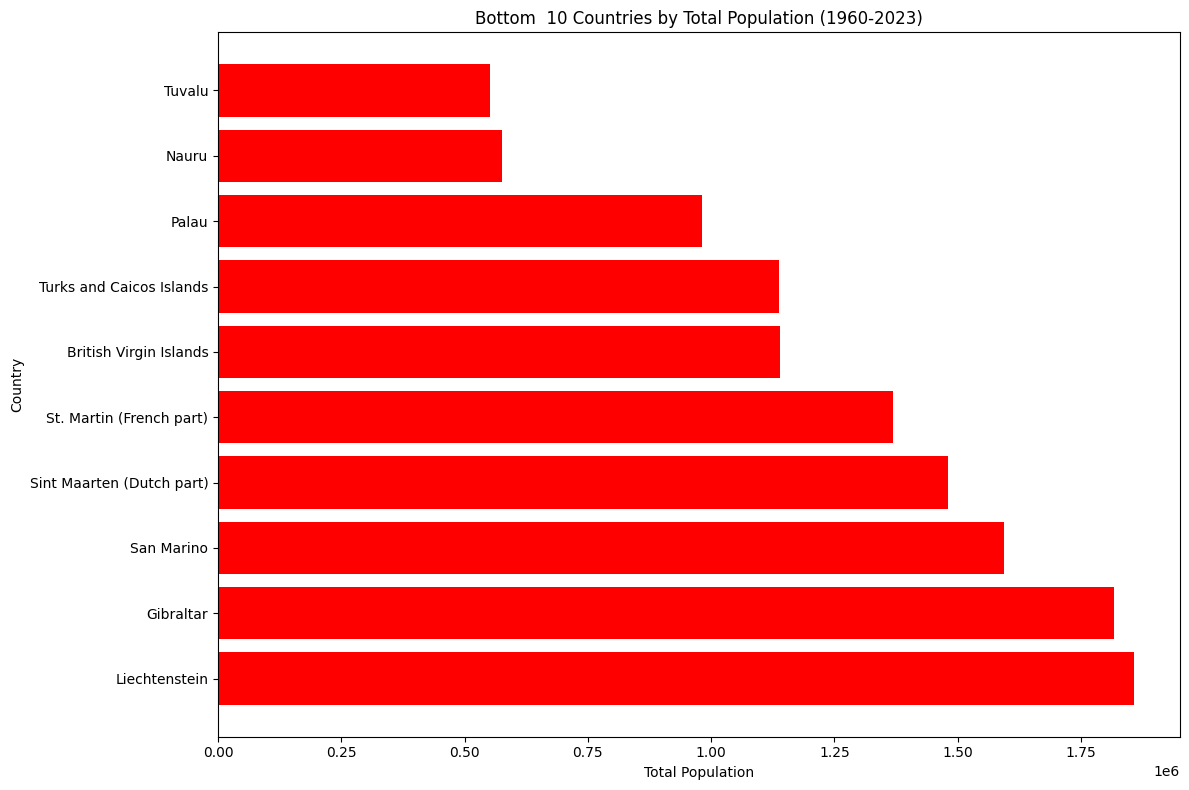

In [18]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(bottom_10_countries['Country Name'], bottom_10_countries['Total_Population'], color='red')
plt.title('Bottom  10 Countries by Total Population (1960-2023)')
plt.xlabel('Total Population')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.tight_layout()
plt.show()


In [19]:
df['Total_Population'] = df.loc[:, '1960':'2023'].sum(axis=1)

df_sorted = df.sort_values(by='Total_Population', ascending=False) 

top_10_countries = df_sorted.head(10) 

In [20]:
print(top_10_countries[['Country Name', 'Total_Population']])

                   Country Name  Total_Population
260                       World      3.487119e+11
104            IDA & IBRD total      2.856694e+11
141         Low & middle income      2.716217e+11
157               Middle income      2.494111e+11
103                   IBRD only      2.228708e+11
63   Early-demographic dividend      1.375653e+11
250         Upper middle income      1.323158e+11
140         Lower middle income      1.170952e+11
143   Late-demographic dividend      1.158060e+11
64          East Asia & Pacific      1.150760e+11


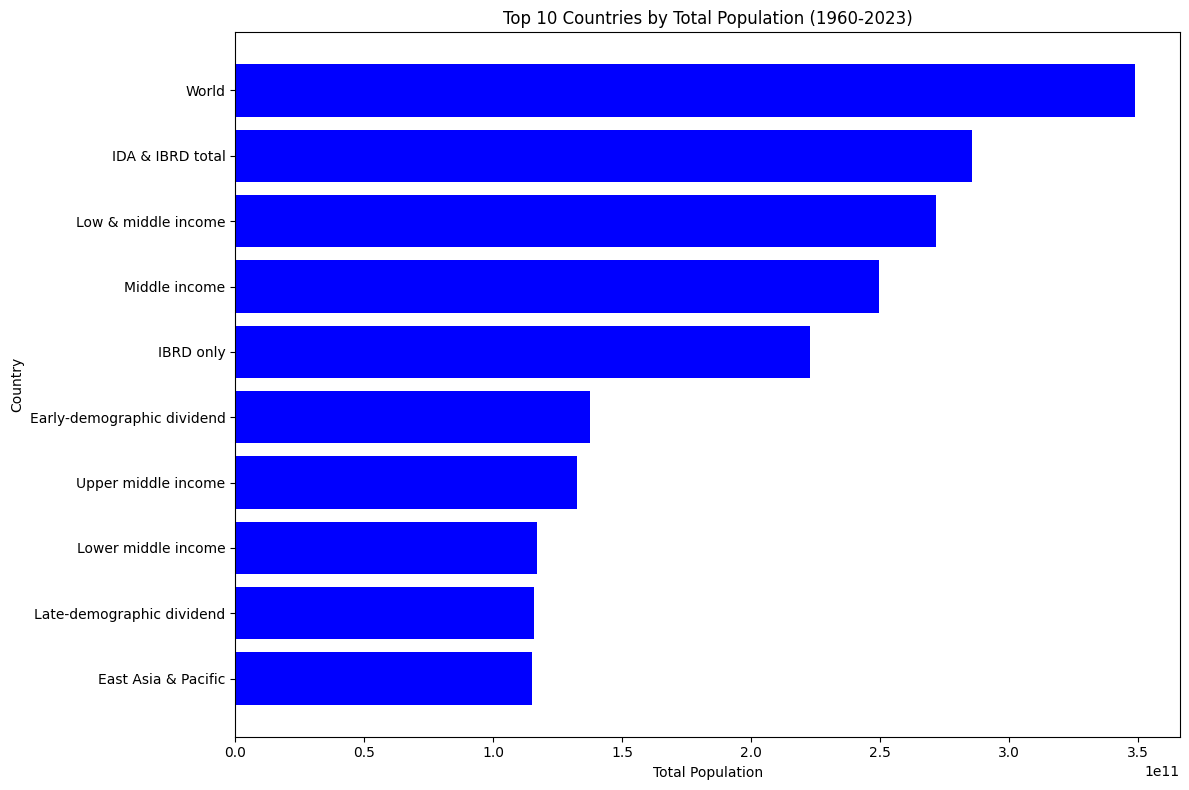

In [21]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_10_countries['Country Name'], top_10_countries['Total_Population'], color='blue')
plt.title('Top 10 Countries by Total Population (1960-2023)')
plt.xlabel('Total Population')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.tight_layout()
plt.show()


In [22]:
total_population_sorted = df.sort_values(by=["1960","2023"], ascending=True)

 # Get the top ten countries with the highest total population for that year
bottom_ten_countries = total_population_sorted.head(10)

# Print or display the top ten countries
print("Bottom ten countries of total population")
print(bottom_ten_countries[['Country Name','1960', '2023']]) 

Bottom ten countries of total population
                  Country Name    1960     2023
226  Sint Maarten (Dutch part)  2646.0  41163.0
148   St. Martin (French part)  4135.0  32077.0
180                      Nauru  4582.0  12780.0
246                     Tuvalu  5404.0  11396.0
229   Turks and Caicos Islands  5604.0  46062.0
256     British Virgin Islands  7850.0  31538.0
53              Cayman Islands  8473.0  69310.0
165   Northern Mariana Islands  8702.0  49796.0
7                      Andorra  9443.0  80088.0
189                      Palau  9446.0  18058.0


In [23]:
total_population_sorted = df.sort_values(by=["1960","2023"], ascending=False)

 # Get the top ten countries with the highest total population for that year
top_ten_countries = total_population_sorted.head(10)

# Print or display the top ten countries
print("Top ten countries of total population")
print(top_ten_countries[['Country Name','1960', '2023']])

Top ten countries of total population
                   Country Name          1960          2023
260                       World  3.031517e+09  8.024997e+09
104            IDA & IBRD total  2.298248e+09  6.819750e+09
141         Low & middle income  2.115448e+09  6.593137e+09
157               Middle income  1.979685e+09  5.870153e+09
103                   IBRD only  1.904143e+09  4.937048e+09
250         Upper middle income  1.150381e+09  2.810588e+09
143   Late-demographic dividend  1.095549e+09  2.326833e+09
64          East Asia & Pacific  1.043334e+09  2.380601e+09
63   Early-demographic dividend  9.794615e+08  3.486290e+09
96                  High income  9.079124e+08  1.403022e+09


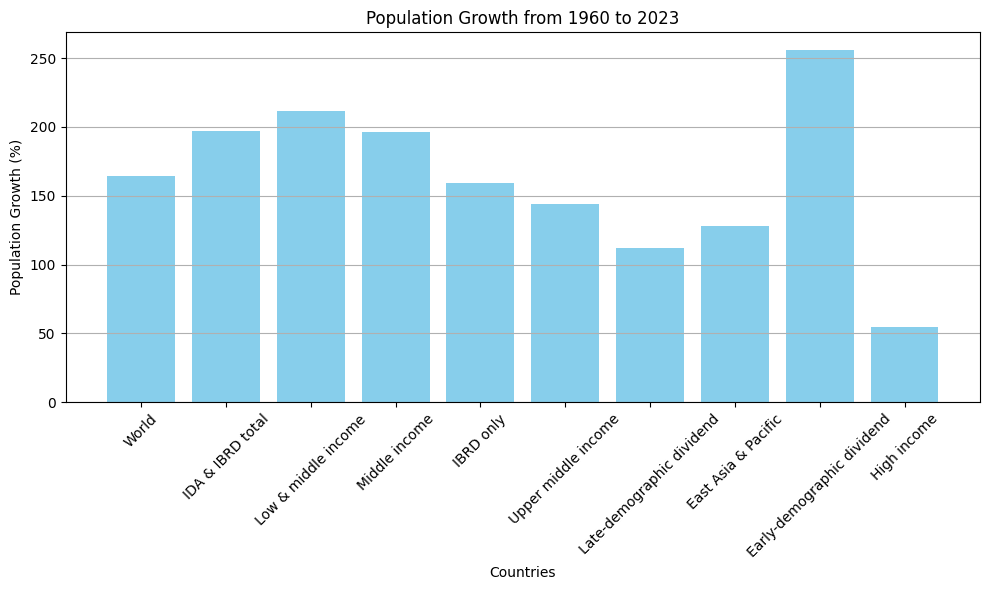

In [24]:
# ploting the graph to demonstrate the groth of population between 1960 to 2023
countries = top_ten_countries['Country Name']
population_1960 = top_ten_countries['1960']
population_2023 = top_ten_countries['2023']

# Calculate growth rate
growth_rate = ((population_2023 - population_1960) / population_1960) * 100

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(countries, growth_rate, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Population Growth (%)')
plt.title('Population Growth from 1960 to 2023')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

Top ten countries by total population in 2023:
                  Country Name     1960     2023
246                     Tuvalu   5404.0  11396.0
180                      Nauru   4582.0  12780.0
189                      Palau   9446.0  18058.0
256     British Virgin Islands   7850.0  31538.0
148   St. Martin (French part)   4135.0  32077.0
85                   Gibraltar  21822.0  32688.0
213                 San Marino  15556.0  33642.0
150                     Monaco  21797.0  36297.0
138              Liechtenstein  16472.0  39584.0
226  Sint Maarten (Dutch part)   2646.0  41163.0


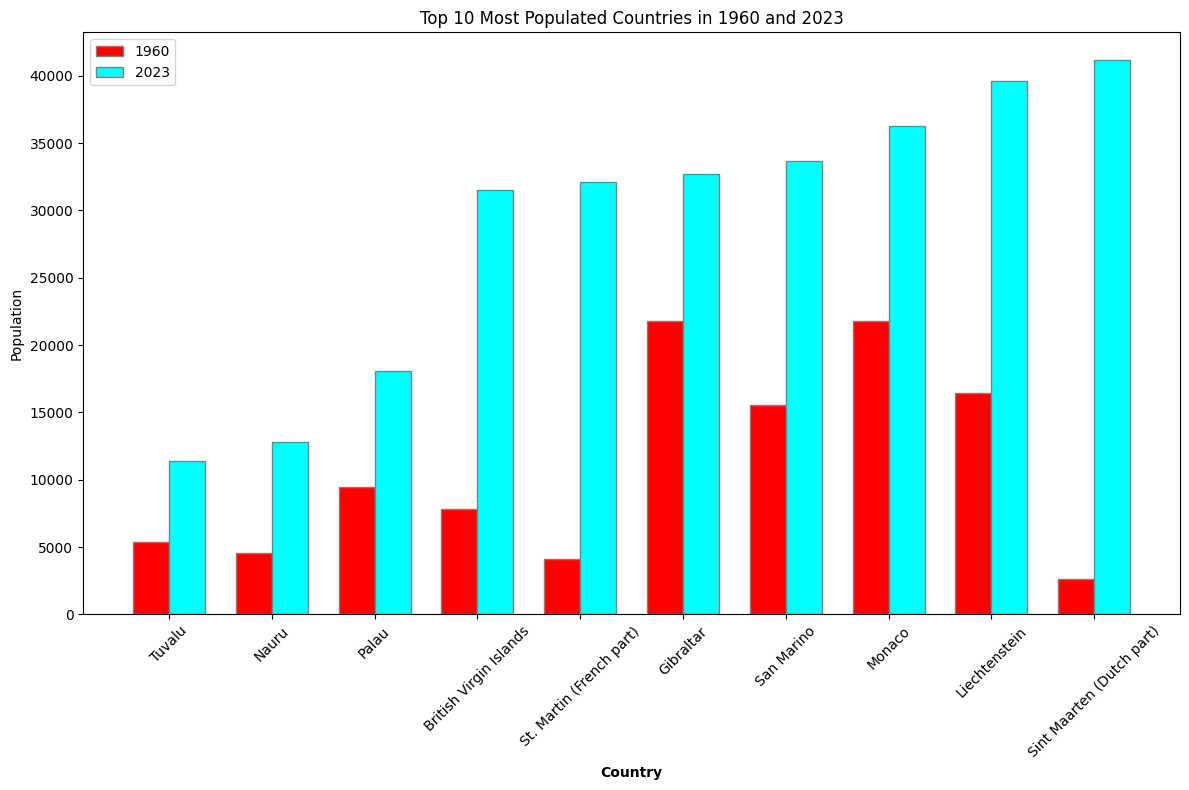

In [25]:
total_population_sorted = df.sort_values(by="2023", ascending=True)
top_ten_countries = total_population_sorted.head(10)

# Print the top ten countries
print("Top ten countries by total population in 2023:")
print(top_ten_countries[['Country Name', '1960', '2023']])

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bar_width = 0.35

# Position of bars on the x-axis
r1 = range(len(top_ten_countries))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, top_ten_countries['1960'], color='red', width=bar_width, edgecolor='grey', label='1960')
plt.bar(r2, top_ten_countries['2023'], color='aqua', width=bar_width, edgecolor='grey', label='2023')

# Add labels
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Population')
plt.title('Top 10 Most Populated Countries in 1960 and 2023')
plt.xticks([r + bar_width/2 for r in range(len(top_ten_countries))], top_ten_countries['Country Name'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Top ten countries by total population in 2023:
                   Country Name          1960          2023
260                       World  3.031517e+09  8.024997e+09
104            IDA & IBRD total  2.298248e+09  6.819750e+09
141         Low & middle income  2.115448e+09  6.593137e+09
157               Middle income  1.979685e+09  5.870153e+09
103                   IBRD only  1.904143e+09  4.937048e+09
63   Early-demographic dividend  9.794615e+08  3.486290e+09
140         Lower middle income  8.293046e+08  3.059565e+09
250         Upper middle income  1.150381e+09  2.810588e+09
64          East Asia & Pacific  1.043334e+09  2.380601e+09
143   Late-demographic dividend  1.095549e+09  2.326833e+09


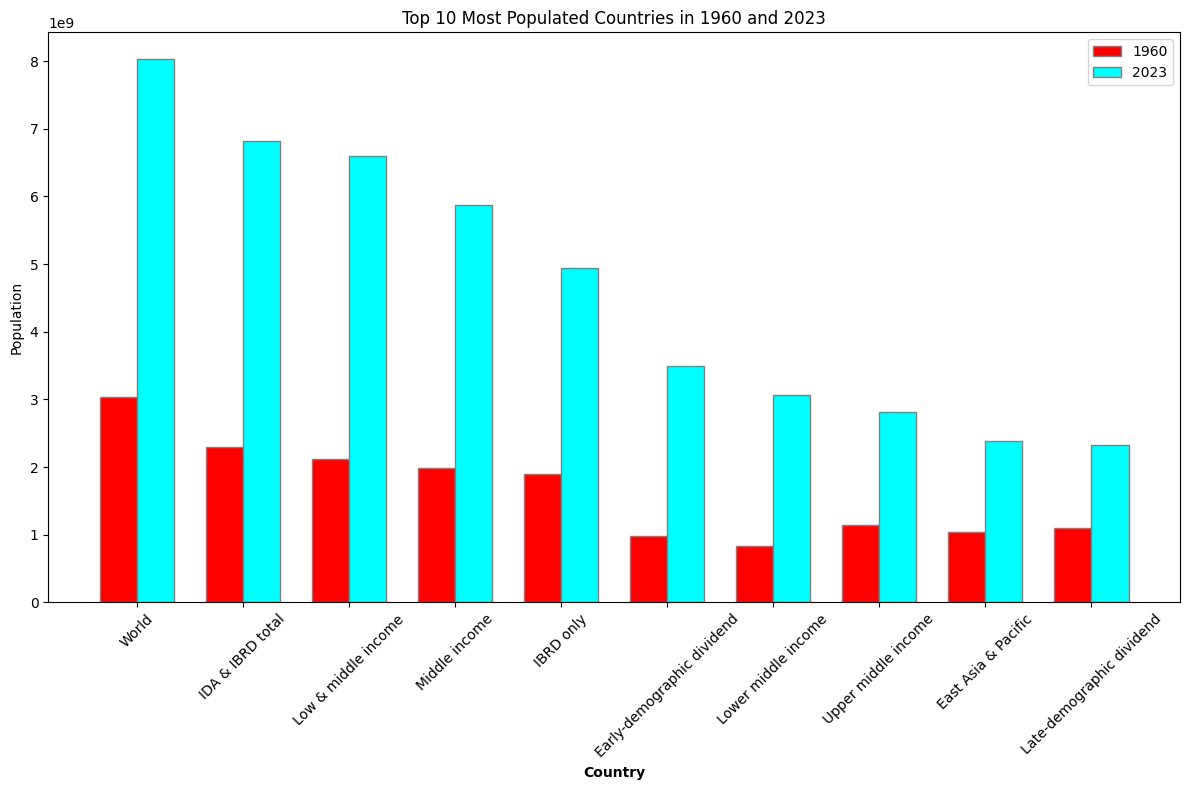

In [26]:
total_population_sorted = df.sort_values(by="2023", ascending=False)
top_ten_countries = total_population_sorted.head(10)

# Print the top ten countries
print("Top ten countries by total population in 2023:")
print(top_ten_countries[['Country Name', '1960', '2023']])

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bar_width = 0.35

# Position of bars on the x-axis
r1 = range(len(top_ten_countries))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, top_ten_countries['1960'], color='red', width=bar_width, edgecolor='grey', label='1960')
plt.bar(r2, top_ten_countries['2023'], color='aqua', width=bar_width, edgecolor='grey', label='2023')

# Add labels
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Population')
plt.title('Top 10 Most Populated Countries in 1960 and 2023')
plt.xticks([r + bar_width/2 for r in range(len(top_ten_countries))], top_ten_countries['Country Name'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

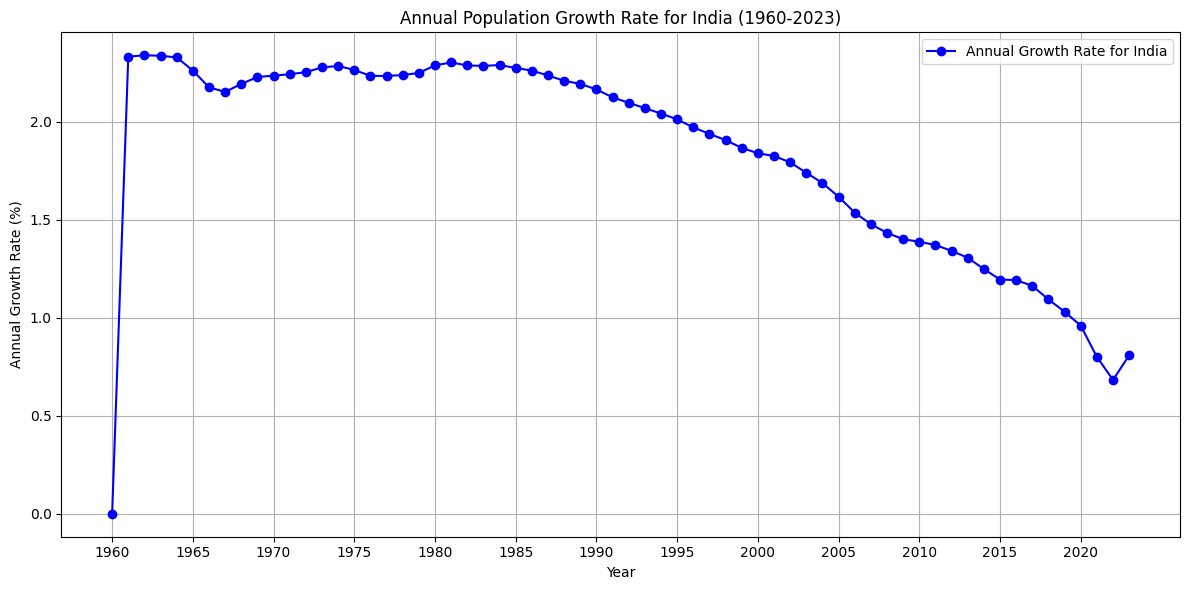

In [27]:
country_name = 'India'

# Filter data for the specific country
country_data = df[df['Country Name'] == country_name]

# Prepare data for plotting
years = range(1960, 2024)
population = country_data.loc[:, '1960':'2023'].values.flatten()
growth_rates = [0] + [(population[i+1] - population[i]) / population[i] * 100 for i in range(len(population) - 1)]

# Plotting the annual growth rates
plt.figure(figsize=(12, 6))
plt.plot(years, growth_rates, marker='o', linestyle='-', color='b', label=f'Annual Growth Rate for {country_name}')
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title(f'Annual Population Growth Rate for {country_name} (1960-2023)')
plt.xticks(range(1960, 2024, 5))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

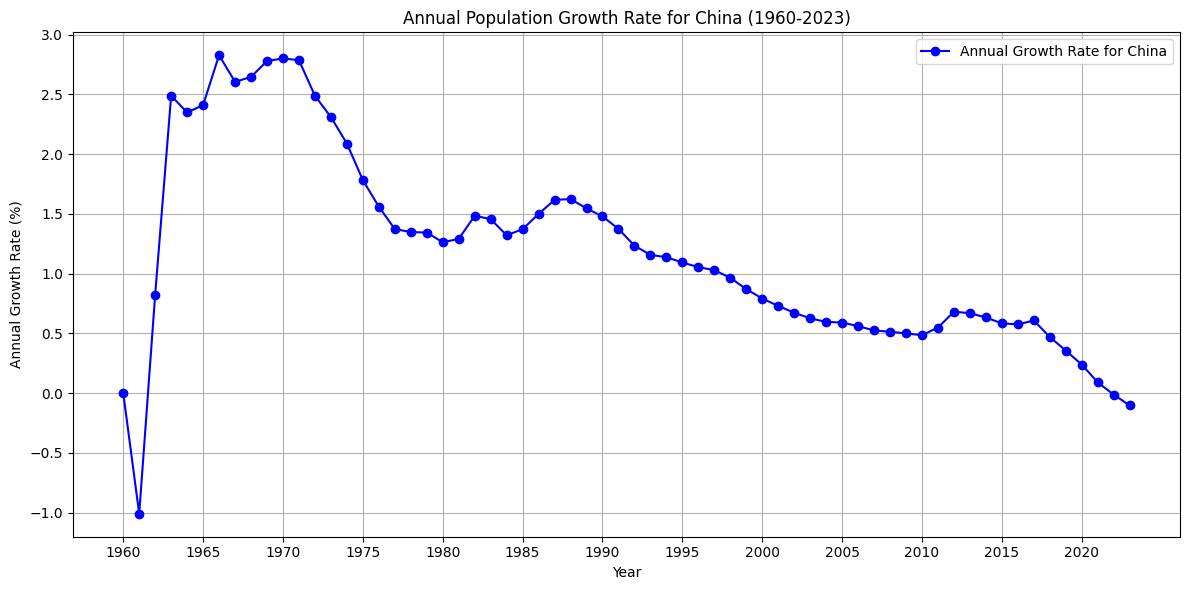

In [28]:
country_name = 'China'

# Filter data for the specific country
country_data = df[df['Country Name'] == country_name]

# Prepare data for plotting
years = range(1960, 2024)
population = country_data.loc[:, '1960':'2023'].values.flatten()
growth_rates = [0] + [(population[i+1] - population[i]) / population[i] * 100 for i in range(len(population) - 1)]

# Plotting the annual growth rates
plt.figure(figsize=(12, 6))
plt.plot(years, growth_rates, marker='o', linestyle='-', color='b', label=f'Annual Growth Rate for {country_name}')
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title(f'Annual Population Growth Rate for {country_name} (1960-2023)')
plt.xticks(range(1960, 2024, 5))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
df = pd.DataFrame(df)

# Get a set of all real country names
real_country_names = {country.name for country in pycountry.countries}

# Filter DataFrame to include only rows with real country names
df_real_countries = df[df['Country Name'].isin(real_country_names)]

print(df_real_countries)

     Country Name Country Code     Indicator Name Indicator Code        1960  \
1           Aruba          ABW  Population, total    SP.POP.TOTL     54608.0   
3     Afghanistan          AFG  Population, total    SP.POP.TOTL   8622466.0   
5          Angola          AGO  Population, total    SP.POP.TOTL   5357195.0   
6         Albania          ALB  Population, total    SP.POP.TOTL   1608800.0   
7         Andorra          AND  Population, total    SP.POP.TOTL      9443.0   
..            ...          ...                ...            ...         ...   
259       Vanuatu          VUT  Population, total    SP.POP.TOTL     64608.0   
261         Samoa          WSM  Population, total    SP.POP.TOTL    113335.0   
264  South Africa          ZAF  Population, total    SP.POP.TOTL  16520441.0   
265        Zambia          ZMB  Population, total    SP.POP.TOTL   3119430.0   
266      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   3806310.0   

           1961        1962        1963

In [30]:
# male population
male_population_data = df[df["Indicator Code"] == "SP.POP.TOTL.MA.IN"]

male_population_sorted = male_population_data.sort_values(by="2023", ascending=False)

male_top_ten_countries = male_population_sorted.head(10)
print("Top ten countries of male population")
print(male_top_ten_countries )

Top ten countries of male population
Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, Total_Population]
Index: []

[0 rows x 69 columns]


In [31]:
 # female population
male_population_data = df[df["Indicator Code"] == "SP.POP.TOTL.FE.IN"]

# Sort data based on the male population for 2023
male_population_sorted = male_population_data.sort_values(by="2023", ascending=False)

male_top_ten_countries = male_population_sorted.head(10)
print("Top ten countries of male population")
print(male_top_ten_countries )

Top ten countries of male population
Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, Total_Population]
Index: []

[0 rows x 69 columns]
